# 파일 불러오기 및 전처리

In [1]:
import os
import pandas as pd
import missingno as msno

rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id','rating', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python')
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['rating']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [3]:
# rating 컬럼의 이름을 play로 바꿉니다.
ratings.rename(columns={'rating':'play'}, inplace=True)

In [4]:
ratings.head()

,user_id,movie_id,play,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## ratings 데이터프레임 정보 및 결측치 확인

In [5]:
ratings['movie_id'].nunique()

3628

In [6]:
ratings['user_id'].nunique()

6039

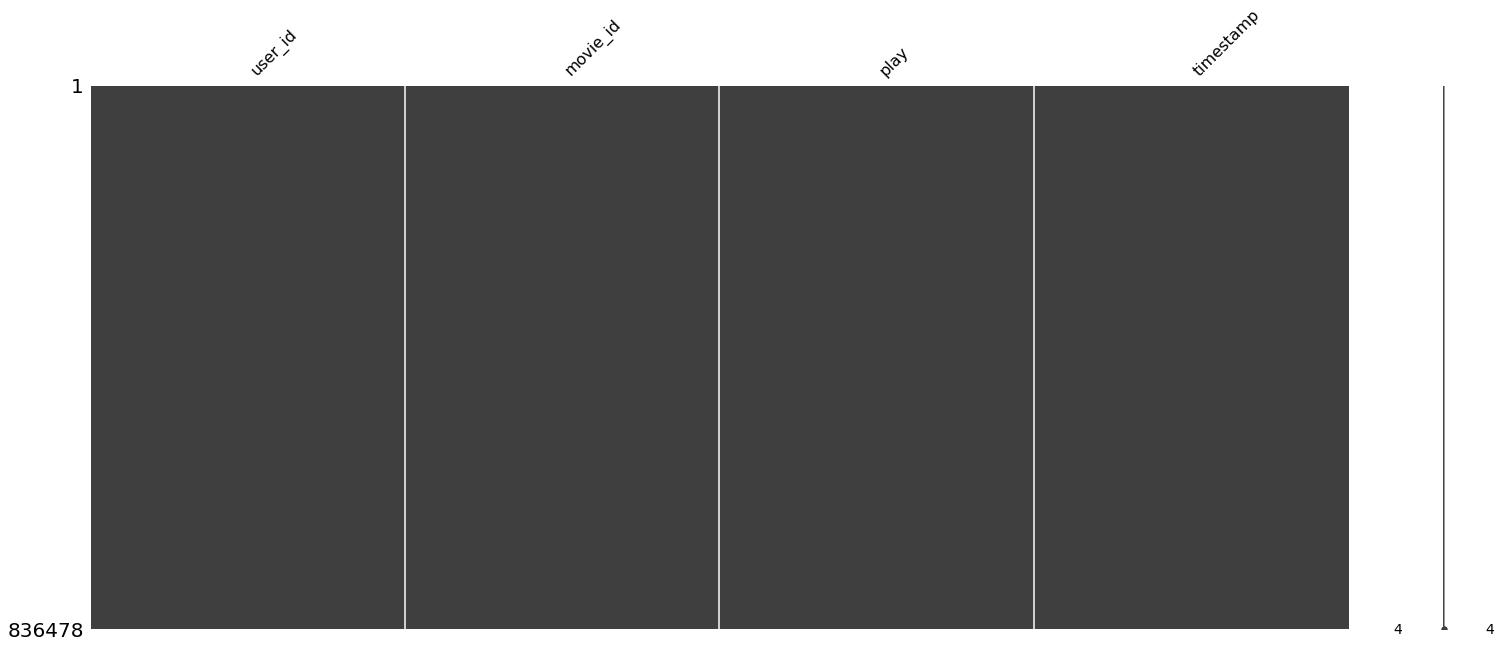

In [7]:
msno.matrix(ratings)

In [8]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python')
movies.title = movies.title.str.replace(' ', '_')
movies.head()

,movie_id,title,genre
0,1,Toy_Story_(1995),Animation|Children's|Comedy
1,2,Jumanji_(1995),Adventure|Children's|Fantasy
2,3,Grumpier_Old_Men_(1995),Comedy|Romance
3,4,Waiting_to_Exhale_(1995),Comedy|Drama
4,5,Father_of_the_Bride_Part_II_(1995),Comedy


## movies 데이터프레임 정보 및 결측치 확인

In [9]:
movies['movie_id'].nunique()

3883

In [10]:
movies['title'].nunique()

3883

In [11]:
movies['genre'].nunique()

301

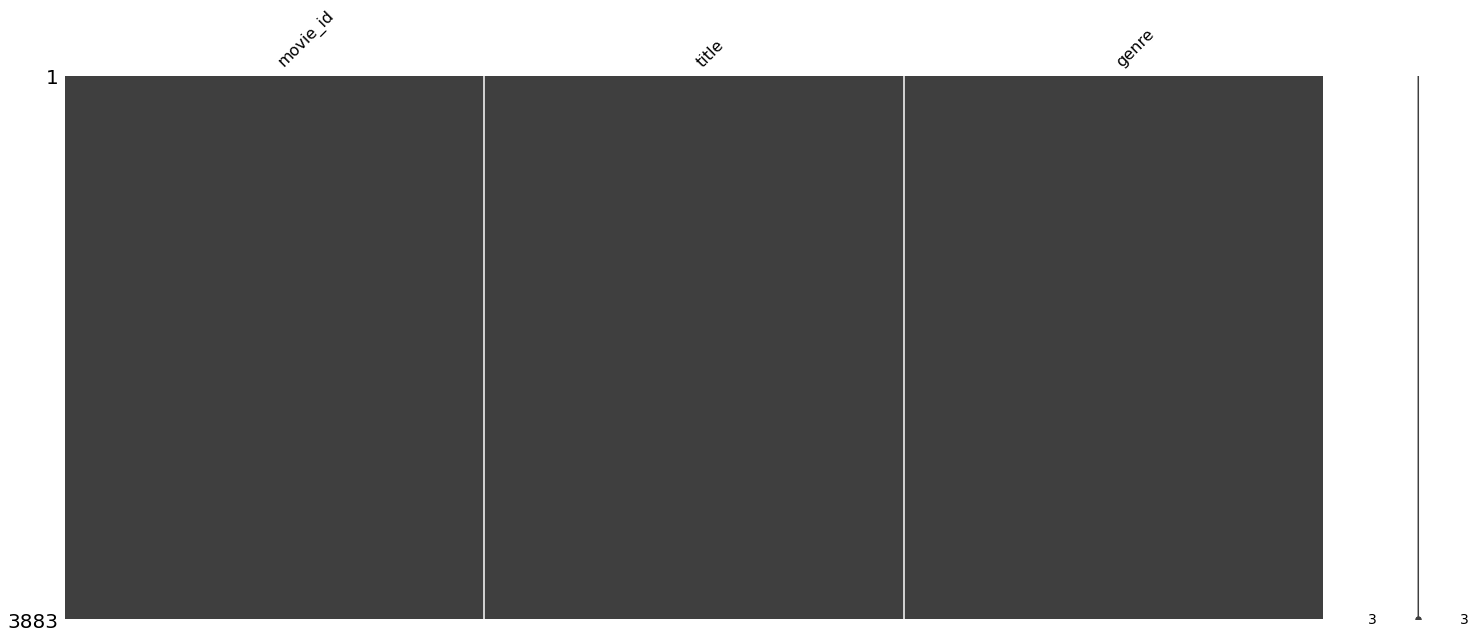

In [12]:
msno.matrix(movies)

In [13]:
# 유저, 영화 indexing 하는 코드 idx는 index의 약자입니다.
idx_to_movie = {i:v for i,v in zip(movies['movie_id'],movies['title'])}
movie_to_idx = {v:i for i,v in zip(movies['movie_id'],movies['title'])}

merge함수 대신 map함수 사용해서 데이터프레임에 movie_name column추가하기

In [14]:
ratings['movie_name'] = ratings['movie_id'].map(idx_to_movie)

In [15]:
print(type(ratings))
ratings

<class 'pandas.core.frame.DataFrame'>


,user_id,movie_id,play,timestamp,movie_name
0,1,1193,5,978300760,One_Flew_Over_the_Cuckoo's_Nest_(1975)
1,1,661,3,978302109,James_and_the_Giant_Peach_(1996)
2,1,914,3,978301968,My_Fair_Lady_(1964)
3,1,3408,4,978300275,Erin_Brockovich_(2000)
4,1,2355,5,978824291,"Bug's_Life,_A_(1998)"
...,...,...,...,...,...
1000203,6040,1090,3,956715518,Platoon_(1986)
1000205,6040,1094,5,956704887,"Crying_Game,_The_(1992)"
1000206,6040,562,5,956704746,Welcome_to_the_Dollhouse_(1995)
1000207,6040,1096,4,956715648,Sophie's_Choice_(1982)


### ratings에 있는 유니크한 영화 개수

In [16]:
ratings['movie_id'].nunique()

3628

### ratings에 있는 유니크한 사용자 수

In [17]:
ratings['user_id'].nunique()

6039

### 가장 인기있는 영화 30개(인기순)

In [18]:
top_movie = ratings.groupby('movie_name')['user_id'].count()
top_movie.sort_values(ascending=False).head(30) # ascending=True 로 하면 인기없는 영화부터 보여준다

movie_name
American_Beauty_(1999)                                   3211
Star_Wars:_Episode_IV_-_A_New_Hope_(1977)                2910
Star_Wars:_Episode_V_-_The_Empire_Strikes_Back_(1980)    2885
Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)        2716
Saving_Private_Ryan_(1998)                               2561
Terminator_2:_Judgment_Day_(1991)                        2509
Silence_of_the_Lambs,_The_(1991)                         2498
Raiders_of_the_Lost_Ark_(1981)                           2473
Back_to_the_Future_(1985)                                2460
Matrix,_The_(1999)                                       2434
Jurassic_Park_(1993)                                     2413
Sixth_Sense,_The_(1999)                                  2385
Fargo_(1996)                                             2371
Braveheart_(1995)                                        2314
Men_in_Black_(1997)                                      2297
Schindler's_List_(1993)                                  22

### 내가 선호하는 영화 5개를 rating에 추가하기

In [19]:
ratings = ratings[['user_id','movie_name','play']]

my_favorite = ['Godfather,_The_(1972)',
               'Star_Wars:_Episode_IV_-_A_New_Hope_(1977)',
               'Star_Wars:_Episode_V_-_The_Empire_Strikes_Back_(1980)',
               'Men_in_Black_(1997)',
               'Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)']

my_movielist = pd.DataFrame({'user_id': ['JPark']*5, 'movie_name': my_favorite, 'play':[5]*5})

if not ratings.isin({'user_id':['JPark']})['user_id'].any():
    ratings = ratings.append(my_movielist)
    
ratings.tail(10)

,user_id,movie_name,play
1000203,6040,Platoon_(1986),3
1000205,6040,"Crying_Game,_The_(1992)",5
1000206,6040,Welcome_to_the_Dollhouse_(1995),5
1000207,6040,Sophie's_Choice_(1982),4
1000208,6040,E.T._the_Extra-Terrestrial_(1982),4
0,JPark,"Godfather,_The_(1972)",5
1,JPark,Star_Wars:_Episode_IV_-_A_New_Hope_(1977),5
2,JPark,Star_Wars:_Episode_V_-_The_Empire_Strikes_Back...,5
3,JPark,Men_in_Black_(1997),5
4,JPark,Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983),5


### 전처리후 데이터 전부 숫자로 인덱싱하기

In [20]:
user_unique = ratings['user_id'].unique()
title_unique = ratings['movie_name'].unique()

# 유저, 영화 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
title_to_idx = {v:k for k,v in enumerate(title_unique)}
idx_to_title = {k:v for k,v in enumerate(title_unique)}

# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['JPark'])    # 6040명의 유저 중 마지막으로 추가된 유저이니 6039이 나와야 합니다. 
print(title_to_idx['Men_in_Black_(1997)'])

6039
175


In [21]:
#user_to_idx

In [22]:
#title_to_idx

type of (nunique: int, unique: list)

In [23]:
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 movie 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_title_data = ratings['movie_name'].map(title_to_idx.get).dropna()
if len(temp_title_data) == len(ratings):
    print('movie_name column indexing OK!!')
    ratings['movie_name'] = temp_title_data
else:
    print('movie_name column indexing Fail!!')

ratings

user_id column indexing OK!!
movie_name column indexing OK!!


,user_id,movie_name,play
0,0,0,5
1,0,1,3
2,0,2,3
3,0,3,4
4,0,4,5
...,...,...,...
0,6039,607,5
1,6039,44,5
2,6039,117,5
3,6039,175,5


# CSR matrix 만들기

In [24]:
from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_movie = ratings['movie_name'].nunique()

csr_data = csr_matrix((ratings.play, (ratings.user_id, ratings.movie_name)), shape=(num_user, num_movie))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

# als_model = AlternatingLeastSquares 모델구성 및 트레이닝

In [25]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [26]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, 
                                    use_gpu=False, iterations=15, dtype=np.float32)

In [27]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [28]:
# 모델 훈련
als_model.fit(csr_data_transpose)

# 내가 선호하는 5가지 영화 중 두가지를 골라 모델이 예측한 나의 선호도 파악

In [29]:
JPark = user_to_idx['JPark']
GF    = title_to_idx['Godfather,_The_(1972)']
SW_4  = title_to_idx['Star_Wars:_Episode_IV_-_A_New_Hope_(1977)']

JPark_vector = als_model.user_factors[JPark]
GF_vector   = als_model.item_factors[title_to_idx['Godfather,_The_(1972)']]
SW_4_vector  = als_model.item_factors[title_to_idx['Star_Wars:_Episode_IV_-_A_New_Hope_(1977)']]

In [30]:
JPark_vector

array([-4.49380204e-02,  6.53503478e-01,  2.24259734e-01,  1.57309528e-02,
        4.71835643e-01, -6.69112504e-01,  5.94351113e-01,  1.15292835e+00,
       -2.11536169e-01,  1.17819414e-01, -4.21066254e-01,  1.81462720e-01,
       -3.18736911e-01,  1.02336979e+00,  7.66242981e-01,  7.81295061e-01,
        6.64820254e-01, -2.36388613e-02,  6.20907366e-01, -1.61431146e+00,
        5.86634614e-02, -2.31523439e-01, -7.34335929e-02,  1.58889756e-01,
       -1.58679515e-01,  1.21953535e+00,  3.88791174e-01, -2.38815397e-01,
       -1.59794360e-03,  2.09903598e-01,  1.79750487e-01, -1.41443467e+00,
       -7.46725678e-01, -8.83695334e-02,  3.63645941e-01, -9.07291412e-01,
       -2.12717220e-01, -3.20800781e-01,  7.76615024e-01, -5.55587560e-03,
        4.18399245e-01,  2.79227167e-01, -2.39993557e-02,  7.12978169e-02,
        7.00827479e-01,  2.03451842e-01, -1.79149762e-01, -6.34432435e-01,
       -4.34099287e-01,  2.37037584e-01, -5.94050944e-01,  4.45876755e-02,
        7.42758811e-01, -

In [31]:
GF_vector

array([-3.3386266e-03,  1.7434036e-02,  3.1154234e-02,  2.1657184e-02,
        2.0046899e-02,  1.2192330e-02,  2.8608294e-02,  3.7975188e-02,
       -1.3805401e-02,  1.8839065e-02,  1.8548464e-02,  4.1330382e-02,
       -2.6814602e-02,  2.4367895e-02, -1.5942303e-02,  5.8421181e-03,
        2.2353489e-02,  4.1401330e-03,  6.9818273e-03, -4.6991076e-02,
        1.6713420e-02,  3.4067002e-03, -9.0716379e-03,  1.9794606e-02,
        4.7243815e-02,  2.3227610e-02,  3.3392571e-02, -3.2232922e-02,
       -1.0532277e-02, -1.4790087e-02, -1.9483158e-02, -3.1502340e-02,
       -5.9340470e-03, -5.5418145e-03,  7.2918221e-04, -3.4099799e-02,
       -1.7574649e-02, -1.2676867e-02, -4.5946852e-04, -2.5931199e-03,
        1.9580554e-02,  4.7592811e-02,  2.4576453e-02, -5.2677295e-03,
        8.3611943e-03,  1.8574871e-02,  4.3536918e-03, -1.4664034e-02,
        2.3751045e-02,  1.9966988e-02, -4.0058754e-02,  1.4813856e-04,
        8.4975725e-03,  3.4544699e-02, -1.5613549e-02,  1.2119575e-02,
      

In [32]:
SW_4_vector

array([-2.78114644e-03,  7.81238498e-03,  1.11035828e-03, -1.13798268e-02,
        1.88691095e-02, -1.52539955e-02,  1.24605633e-02,  2.28035375e-02,
       -4.20701411e-03,  4.55717091e-03, -1.81977600e-02,  1.33883953e-02,
        7.85740651e-03,  2.87879501e-02,  2.15693749e-02,  3.61286998e-02,
        1.62424631e-02, -3.11535504e-03,  2.80298106e-02, -2.88559906e-02,
       -2.18440294e-02, -5.40596945e-03, -1.54237077e-02,  2.09586080e-02,
       -3.93623207e-03,  4.49010059e-02,  7.95934070e-03,  1.62403826e-02,
        1.32364975e-02,  2.53821202e-02,  1.97650716e-02, -1.60023030e-02,
       -1.26905413e-02,  6.60722004e-03,  2.74449829e-02, -7.49566080e-03,
       -6.21279608e-03,  1.04992231e-03,  1.93467513e-02,  2.73412168e-02,
        1.31646274e-02,  3.99963856e-02,  1.58446524e-02,  9.80288349e-03,
        3.21040526e-02, -2.10346561e-02, -8.80950689e-03, -1.63289625e-02,
       -9.95072350e-03,  6.37926348e-03, -4.48369840e-03,  2.85418816e-02,
        2.48034764e-02, -

### 선호도 찾기

In [33]:
np.dot(JPark_vector, GF_vector)

0.70429695

In [34]:
np.dot(JPark_vector, SW_4_vector)

0.78523797

# 내가 좋아하는 영화와 비슷한 영화 추천받기

In [35]:
def get_similar_movie(movie_name: str):
    Movieee_id = title_to_idx[movie_name]
    similar_movie = als_model.similar_items(Movieee_id, N=15)
    similar_movie = [idx_to_title[i[0]] for i in similar_movie]
    return similar_movie

In [36]:
get_similar_movie('Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)')

['Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)',
 'Star_Wars:_Episode_V_-_The_Empire_Strikes_Back_(1980)',
 'Star_Wars:_Episode_IV_-_A_New_Hope_(1977)',
 'Raiders_of_the_Lost_Ark_(1981)',
 'Star_Wars:_Episode_I_-_The_Phantom_Menace_(1999)',
 'Indiana_Jones_and_the_Last_Crusade_(1989)',
 'Saving_Private_Ryan_(1998)',
 'Back_to_the_Future_(1985)',
 'Forrest_Gump_(1994)',
 'Open_Season_(1996)',
 'Stranger,_The_(1994)',
 'Condition_Red_(1995)',
 'Terminator,_The_(1984)',
 'Allnighter,_The_(1987)',
 'Soft_Toilet_Seats_(1999)']

# 내가 좋아하는 영화 추천받기

In [37]:
user = user_to_idx['JPark']
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(380, 0.57631505),
 (120, 0.5100262),
 (60, 0.47899926),
 (107, 0.4121335),
 (92, 0.34506053),
 (124, 0.29061863),
 (48, 0.2836028),
 (0, 0.24402252),
 (550, 0.24029097),
 (435, 0.23245847),
 (5, 0.2264647),
 (26, 0.22459815),
 (172, 0.22277124),
 (22, 0.21926036),
 (200, 0.21232915),
 (99, 0.20369908),
 (670, 0.19655627),
 (160, 0.1866399),
 (62, 0.18610574),
 (372, 0.18550037)]

In [38]:
[idx_to_title[i[0]] for i in movie_recommended]

['Godfather:_Part_II,_The_(1974)',
 'Raiders_of_the_Lost_Ark_(1981)',
 'Star_Wars:_Episode_I_-_The_Phantom_Menace_(1999)',
 'Jurassic_Park_(1993)',
 'Terminator_2:_Judgment_Day_(1991)',
 'Matrix,_The_(1999)',
 'Saving_Private_Ryan_(1998)',
 "One_Flew_Over_the_Cuckoo's_Nest_(1975)",
 'Dr._Strangelove_or:_How_I_Learned_to_Stop_Worrying_and_Love_the_Bomb_(1963)',
 'Godfather:_Part_III,_The_(1990)',
 'Princess_Bride,_The_(1987)',
 'E.T._the_Extra-Terrestrial_(1982)',
 'Indiana_Jones_and_the_Last_Crusade_(1989)',
 'Back_to_the_Future_(1985)',
 'Terminator,_The_(1984)',
 'American_Beauty_(1999)',
 'Galaxy_Quest_(1999)',
 'Forrest_Gump_(1994)',
 'Total_Recall_(1990)',
 'X-Men_(2000)']

## 추천받은 영화중 특정 영화의 기여도 알아보기

In [39]:
Godfather_2 = title_to_idx['Godfather:_Part_II,_The_(1974)']
explain = als_model.explain(user, csr_data, 
                            itemid=title_to_idx["Godfather:_Part_II,_The_(1974)"])

In [40]:
[(idx_to_title[i[0]], i[1]) for i in explain[1]]

[('Godfather,_The_(1972)', 0.5670457444628036),
 ('Star_Wars:_Episode_V_-_The_Empire_Strikes_Back_(1980)', 0.0146153095337839),
 ('Star_Wars:_Episode_IV_-_A_New_Hope_(1977)', -0.001553835082803598),
 ('Men_in_Black_(1997)', -0.0027551960124631977),
 ('Star_Wars:_Episode_VI_-_Return_of_the_Jedi_(1983)', -0.010693489292042226)]

# 결과 및 총평

유저들의 매긴 영화의 평점을 기반으로한 추천시스템을 만드는 작업을 하였다.  
데이터의 전처리 과정에서 여러 함수들의 사용법을 알 수 있었다.  
또 모델의 훈련 과정을 수월하게 진행하기 위해 모든 정보들을 숫자로 인덱싱하는 작업을 하였다.  
훈련시킨 모델에서 내가 좋아하는 영화들의 선호도를 보았을때 상당히 잘 훈련된 모델임을 알 수 있었다.
또 특정 title과 user_id를 통해 비슷한 영화를 추천 받아보았는데 상당히 취향을 잘 맞춘것을 알 수 있었다.

### 결국 제일 중요한 것은 전처리과정이라는 것 또한 깨닳았다.
